In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df=pd.read_csv("https://raw.githubusercontent.com/jarif87/DataSets/main/linear_data.csv")

In [47]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [48]:
df.shape

(500, 2)

In [49]:
df.isnull().sum()

,0
x,0
y,0


In [50]:
df.describe()

,x,y
count,500.000000,500.000000
mean,5.000000,15.020686
std,2.895428,5.793427
min,0.000000,4.447692
25%,2.500000,9.960991
50%,5.000000,15.081330
75%,7.500000,19.962119
max,10.000000,25.789154


In [51]:
df2=pd.read_csv("https://raw.githubusercontent.com/jarif87/DataSets/main/nonlinear_data.csv")

In [52]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [53]:
df2.shape

(500, 2)

In [54]:
df2.describe()

,x,y
count,500.000000,500.000000
mean,5.000000,0.363464
std,2.895428,1.340653
min,0.000000,-2.170347
25%,2.500000,-0.818224
50%,5.000000,0.627766
75%,7.500000,1.619506
max,10.000000,2.192974


In [55]:
df2.isnull().sum()

,0
x,0
y,0


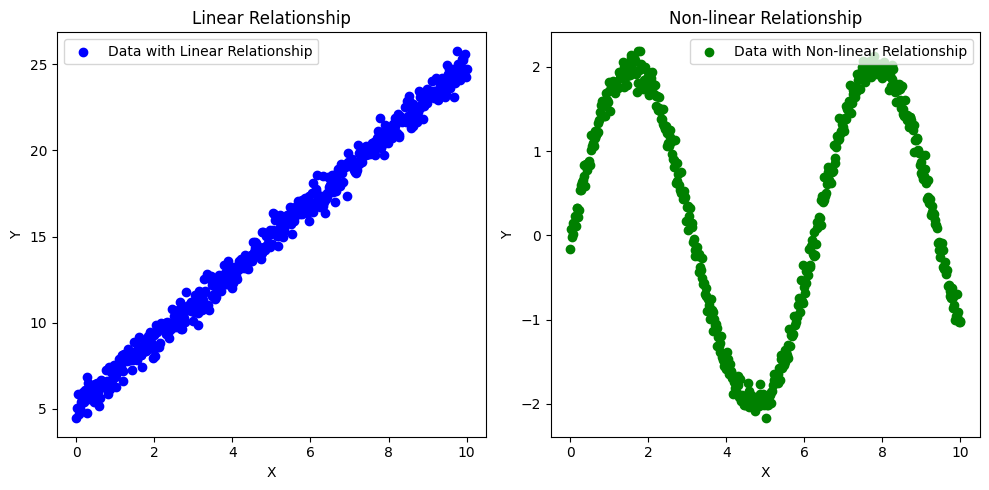

In [56]:
#linear
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(df.x, df.y, color='blue', label='Data with Linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()

#non-linear
plt.subplot(1, 2, 2)
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation coefficients

In [57]:
correlation_linear = np.corrcoef(df.x, df.y)
print("Correlation coefficient for linear relationship:", correlation_linear)

Correlation coefficient for linear relationship: [[1.         0.99643985]
 [0.99643985 1.        ]]


In [58]:
df.corr()

,x,y
x,1.00000,0.99644
y,0.99644,1.00000


In [59]:
correlation_nonlinear = np.corrcoef(df2.x, df2.y)[0, 1]
print("Correlation coefficient for non-linear relationship:", correlation_nonlinear)

Correlation coefficient for non-linear relationship: -0.06573583283905132


In [60]:
df2.corr()

,x,y
x,1.000000,-0.065736
y,-0.065736,1.000000


# LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
df.head()

,x,y
0,0.00000,4.447692
1,0.02004,5.024612
2,0.04008,5.869593
3,0.06012,4.722490
4,0.08016,4.877101


In [63]:
reg1 = LinearRegression()
reg1.fit(df[['x']] , df.y)
from sklearn.metrics import r2_score
y_pred=reg1.predict(df[["x"]])
r2 = r2_score(df.y, y_pred)
print(f"R² score: {r2}")

R² score: 0.9928923730526016


# Best fit Line

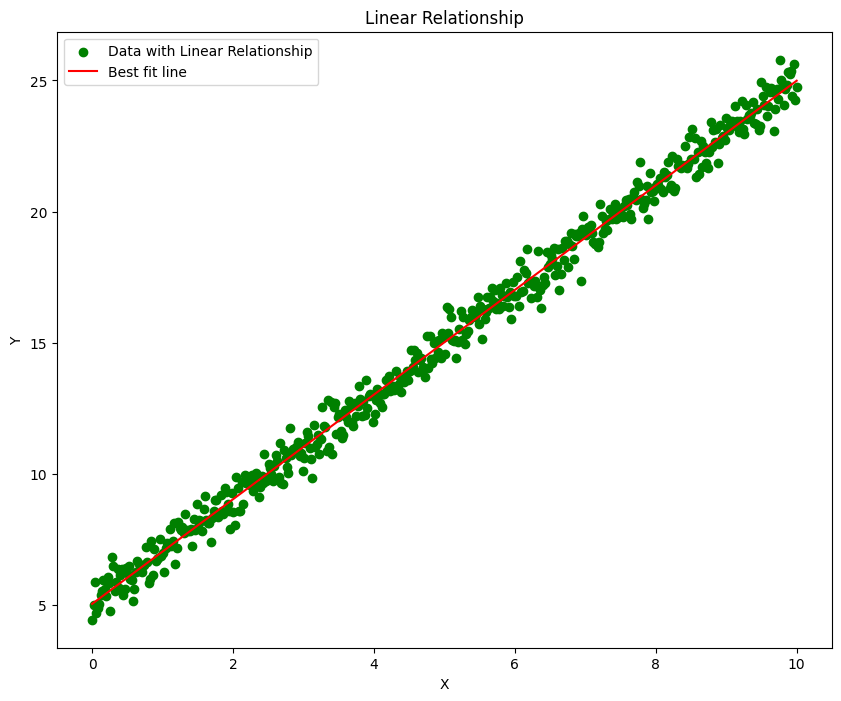

In [64]:
plt.figure(figsize=(10,8))
plt.scatter(df[['x']], df.y, color="green", label='Data with Linear Relationship')
plt.plot(df[['x']],y_pred, color='red', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Relationship')
plt.legend()
plt.show()

# Non Linear Data

In [65]:
df2.head()

,x,y
0,0.00000,-0.155043
1,0.02004,0.081809
2,0.04008,-0.014298
3,0.06012,0.143978
4,0.08016,0.019553


In [66]:
reg2 = LinearRegression()
reg2.fit(df2[['x']], df2.y)
pred=reg2.predict(df2[["x"]])
r = r2_score(df2.y,pred)
print(f"R² score: {r}")

R² score: 0.004321199719043656


# Data with Non-linear Relationship Best fit Line

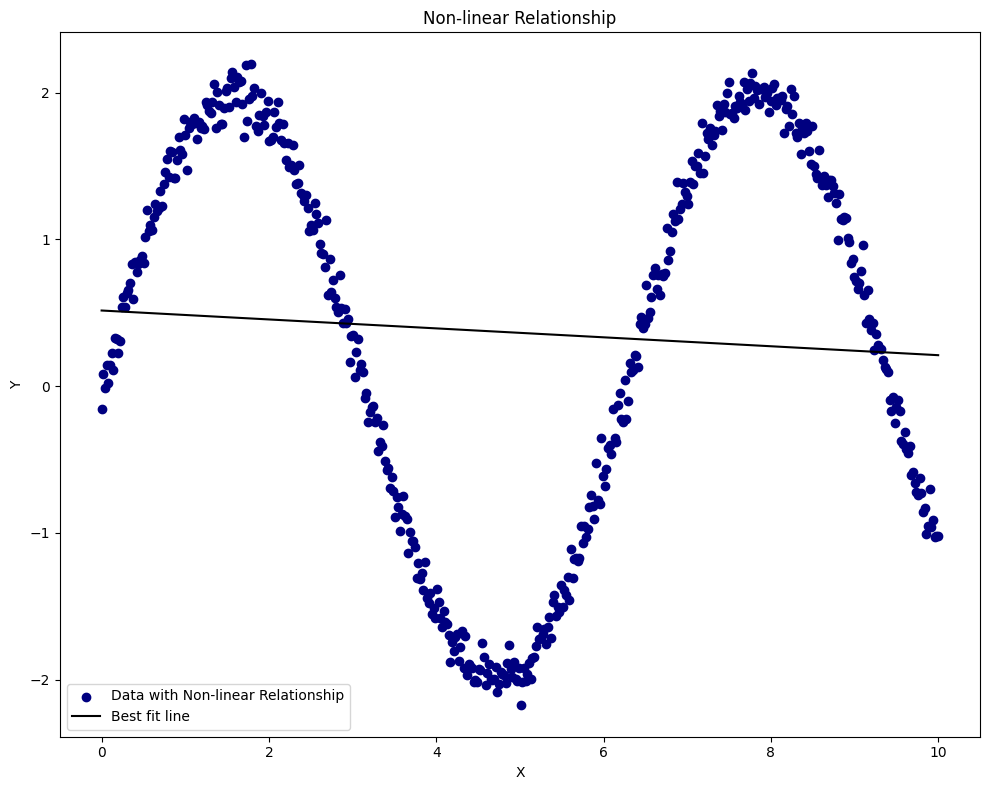

In [67]:
plt.figure(figsize=(10,8))
plt.scatter(df2.x, df2.y, color='navy', label='Data with Non-linear Relationship')
plt.plot(df2[['x']],pred, color='black', label='Best fit line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()

plt.tight_layout()
plt.show()

# Polynomial Regression

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(df2[['x']])

In [69]:
X_poly.shape

(500, 7)

In [70]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6
0,1.0,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,0.02004,0.000402,0.000008,1.612864e-07,3.232193e-09,6.477340e-11
2,1.0,0.04008,0.001606,0.000064,2.580583e-06,1.034302e-07,4.145498e-09
3,1.0,0.06012,0.003614,0.000217,1.306420e-05,7.854229e-07,4.721981e-08
4,1.0,0.08016,0.006426,0.000515,4.128932e-05,3.309766e-06,2.653119e-07
...,...,...,...,...,...,...,...
495,1.0,9.91984,98.403219,976.144159,9.683194e+03,9.605573e+04,9.528574e+05
496,1.0,9.93988,98.801210,982.072144,9.761679e+03,9.702992e+04,9.644657e+05
497,1.0,9.95992,99.200003,988.024080,9.840641e+03,9.801199e+04,9.761916e+05
498,1.0,9.97996,99.599600,994.000016,9.920080e+03,9.900200e+04,9.880360e+05


In [71]:
reg_poly = LinearRegression()
reg_poly.fit(X_poly, df2.y)
pred2=reg_poly.predict(X_poly)
print("R2 score :",r2_score(df2.y,pred2))

R2 score : 0.993062484449735


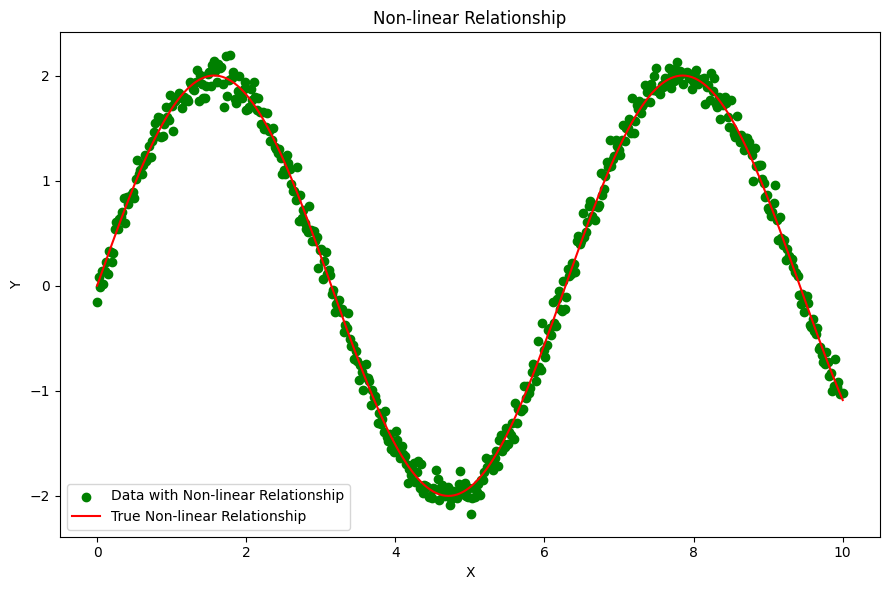

In [73]:
plt.figure(figsize=(9,6))
plt.scatter(df2.x, df2.y, color='green', label='Data with Non-linear Relationship')
plt.plot(df2.x, 2 * np.sin(df2.x), color='red', label='True Non-linear Relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-linear Relationship')
plt.legend()
plt.tight_layout()
plt.show()

# Testing Overfit or Bestfit

In [77]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_poly, df2.y, test_size=0.25, random_state=0)
reg_poly.fit(xtrain, ytrain)
pred3=reg_poly.predict(xtest)
print("R2 score :",r2_score(ytest,pred3))

R2 score : 0.9921870558224147


# model is best fit